In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
COORDINATES = ["chrom", "pos", "ref", "alt"]

subset_filter = "non_coding"

dataset_renaming = {
    "mendelian_matched_9": "Mendelian traits",
    "gwas_matched_9": "Complex traits",
}

dataset = "gwas_matched_9"
#dataset = "mendelian_matched_9"
base_dir = f"../../results/dataset/{dataset}"
V = pd.read_parquet(f"{base_dir}/test.parquet").query("label")
V = V.merge(
    pd.read_parquet(f"{base_dir}/subset/{subset_filter}.parquet"),
    how="inner", on=COORDINATES
)
V

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group
0,1,2293397,G,A,0.999932,Height,True,0.370570,32.3020,dELS,65077,dELS_0
1,1,3080038,T,C,0.999895,"MCH,MCV,Plt,RBC",True,0.232720,31.6060,dELS,10826,dELS_1
2,1,3774964,A,G,0.999973,"Hb,HbA1c,MCHC,RBC",True,0.230570,95.3170,dELS,2138,dELS_2
3,1,9181780,G,A,1.000000,"AST,Mono",True,0.074322,35.4720,non_coding_transcript_exon_variant,52677,non_coding_transcript_exon_variant_0
4,1,9295877,G,T,0.993319,DVT,True,0.265060,46.3070,dELS,1348,dELS_3
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,22,45969257,G,A,0.999905,eBMD,True,0.002641,9.5349,dELS,3457,dELS_207
1157,22,45979731,C,T,0.980260,eBMD,True,0.167140,37.7760,dELS,2568,dELS_208
1158,22,46219479,G,A,0.945802,BW,True,0.128710,164.8500,dELS_flank,28805,dELS_flank_108
1159,22,47990921,C,T,0.997536,BMI,True,0.437610,53.5140,intron_variant,498631,intron_variant_124


In [21]:
consequences = {
    "nonexonic_AND_distal": "Non-exonic-distal",
    "nonexonic_AND_proximal": "Non-exonic-proximal",
    "5_prime_UTR_variant": "5' UTR",
    "3_prime_UTR_variant": "3' UTR",
    "non_coding_transcript_exon_variant": "ncRNA",
}

V["consequence"] = "Other"

for consequence, label in consequences.items():
    if "mask" in V.columns: V = V.drop(columns="mask")
    df = pd.read_parquet(f"{base_dir}/subset/{consequence}.parquet")
    df["mask"] = True
    V = V.merge(df, how="left", on=COORDINATES).fillna(False)
    V.loc[V["mask"], "consequence"] = label

V["consequence"].value_counts()

consequence
Non-exonic-distal      872
Non-exonic-proximal    105
ncRNA                   69
3' UTR                  52
5' UTR                  42
Other                   21
Name: count, dtype: int64

In [22]:
cs = list(consequences.values()) + ["Other"]
cs

['Non-exonic-distal',
 'Non-exonic-proximal',
 "5' UTR",
 "3' UTR",
 'ncRNA',
 'Other']

In [23]:
df = V["consequence"].value_counts()
palette = sns.color_palette('Set2')
palette = [palette[cs.index(c)] for c in df.index]
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

In [24]:
df.index = df.index + " (" + df.astype(str) + ")"
df

Non-exonic-distal (872)      872
Non-exonic-proximal (105)    105
ncRNA (69)                    69
3' UTR (52)                   52
5' UTR (42)                   42
Other (21)                    21
Name: count, dtype: int64

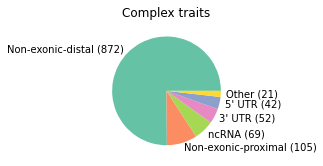

In [25]:
df.plot.pie(colors=palette, figsize=(2.5,2.5))
plt.ylabel("")
plt.title(dataset_renaming[dataset]);
plt.savefig(f"../../results/plots/consequence_distribution_{dataset}.svg", bbox_inches="tight")